In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import numpy as np
from joblib import Parallel, delayed

In [81]:
df = pd.read_csv("../train.csv")

In [82]:
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [83]:
base_path = "../train_eegs/"

In [84]:
def central_window_eeg(df, window_seconds=10):
    start = df.index[0]
    end = df.index[-1]
    mid = (start + end) / 2
    new_start = int(mid - window_seconds/2 * 200) - start
    new_end = int(mid + window_seconds/2 * 200) - start
    return df.iloc[new_start:new_end]

In [85]:
from scipy import signal

fs = 200
b_notch, a_notch = signal.iirnotch(60, 30.0, fs)
b_lowpass, a_lowpass = signal.butter(4, 10, btype="lowpass", fs=200)

def filt(data):
    data = signal.filtfilt(b_notch, a_notch, data)
    return signal.filtfilt(b_lowpass, a_lowpass, data)

In [86]:
def plot_eeg(df, moving_avg=1):
    fig, axs = plt.subplots(20, 1, figsize=(15, 10), sharex=True)
    for i, ax in enumerate(axs):
        ax.plot(filt(df.iloc[:,i]), color="black")
        # x = df.iloc[:,i].rolling(window=moving_avg).mean()
        # ax.plot(x, color="black")
        ax.set_ylabel(df.columns[i], rotation=0)
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
        
    canvas = FigureCanvas(fig)
    canvas.draw()
    plot_array = np.array(canvas.renderer.buffer_rgba())

    plt.close(fig)  # Close the figure to release resources
    
    # filename = f"{output_folder}/plot_array.npy"
    # np.save(filename, plot_array)

    return plot_array

# plot_eeg(central_window_eeg(img))

In [90]:
base_path = "../train_eegs/"
output_folder = "../eeg_imgs"
def lambda_func_eeg(id):
    path = base_path+str(id)+".parquet"
    img = pd.read_parquet(path)
    img = central_window_eeg(img)
    numpy_array = plot_eeg(img)
    
    filename = f"{output_folder}/{id}.npy"
    np.save(filename, numpy_array)
    
    return None

In [88]:
unique_eegs = df["eeg_id"].unique()

In [ ]:
processed_array = 

In [89]:
num_cores = 6  # Adjust this based on your system's capabilities
Parallel(n_jobs=num_cores)(delayed(lambda_func)(x) for x in unique_eegs)

OSError: 6000000 requested and 524240 written

In [ ]:
plot_array = np.load("../eeg_imgs/2277392603.npy")

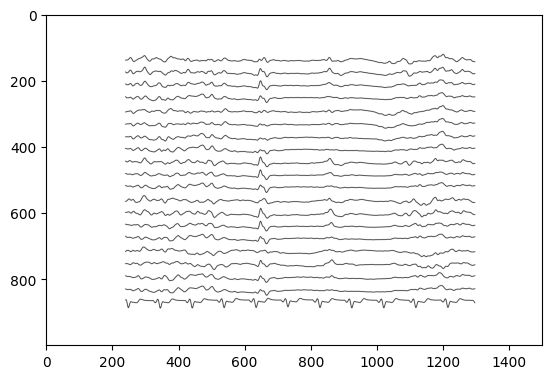

In [ ]:
plt.imshow(plot_array)

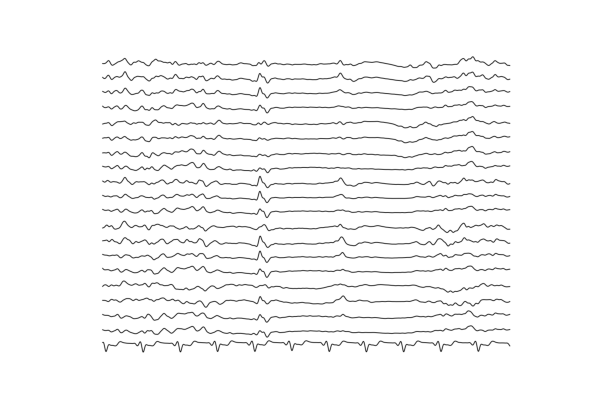

In [ ]:
fig, axs = plt.subplots(1, figsize=(15, 5))
axs.imshow(plot_array, cmap='gray') 
axs.axis('off')
plt.show()


In [ ]:
def plot_spec(df):
    fig, axs = plt.subplots(4, 1, figsize=(15, 10))

    prefixes = ['LL', 'RL', 'LP', 'RP']

    for ax, prefix in zip(axs, prefixes):
        cols = df.filter(regex=f"^{prefix}_").columns
        ax.imshow(df[cols].T, origin="lower", norm="log", cmap="plasma", interpolation="none")
        ax.set_title(prefix)
        ax.set_yticks(np.arange(0, 101, 25.))
        ax.set_yticklabels([0, 5, 10, 15, 20])
        ax.set_ylabel("Freq")
        ax.set_xticks(np.arange(0, 301, 75.))
        ax.set_xticklabels(range(df.iloc[0, 0], df.iloc[-1, 0], (df.iloc[-1, 0]-df.iloc[0, 0])//4))
        ax.set_xlabel("Seconds")

    plt.tight_layout()
    
    canvas = FigureCanvas(fig)
    canvas.draw()
    plot_array = np.array(canvas.renderer.buffer_rgba())

    plt.close(fig)
    
    return plot_array
    

In [ ]:
base_path = "../train_spectrograms"
output_folder = "../spectrogram_imgs"
def lambda_func(id):
    path = base_path+str(id)+".parquet"
    numpy_array = pd.read_parquet(path)
    # img = central_window_eeg(img)
    # numpy_array = plot_eeg(img)
    
    filename = f"{output_folder}/{id}.npy"
    np.save(filename, numpy_array)
    
    return numpy_array

In [91]:
unique_spectrogram = df['spectrogram_id'].unique()

In [93]:
unique_spectrogram = unique_spectrogram[:5]

In [95]:
unique_spectrogram.shape

(5,)

In [ ]:
l